In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
data.drop_duplicates(inplace=True)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [8]:
data['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [10]:
data['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [11]:
smoking_history_mapping = {'never': 0, 'No Info': -1, 'former': 1, 'current': 2, 'ever': 2, 'not current': 0}
data['smoking_history'] = data['smoking_history'].map(smoking_history_mapping)

In [12]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,-1,24.60,4.8,145,0
99996,0,2.0,0,0,-1,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [13]:
data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.794326,0.077601,0.040803,0.029143,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.462948,0.267544,0.197833,0.993422,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.080000,0.000000,0.000000,-1.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,-1.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,2.000000,95.690000,9.000000,300.000000,1.000000


<AxesSubplot:>

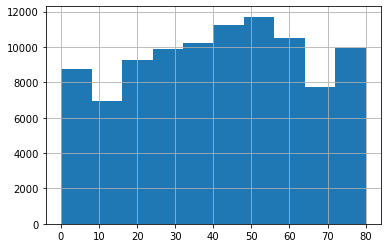

In [14]:
data['age'].hist()

In [15]:
data['age'] = data['age'].astype(int)
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,0,25.19,6.6,140,0
1,0,54,0,0,-1,27.32,6.6,80,0
2,1,28,0,0,0,27.32,5.7,158,0
3,0,36,0,0,2,23.45,5.0,155,0
4,1,76,1,1,2,20.14,4.8,155,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int32  
 1   age                  96146 non-null  int32  
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(2), int32(2), int64(5)
memory usage: 6.6 MB


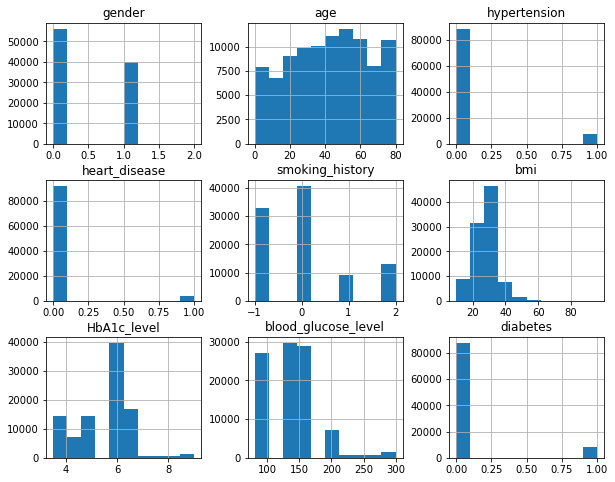

In [17]:
data.hist(bins=10, figsize=(10,8))
plt.show()

In [18]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [19]:
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
X = stand.fit_transform(X)
X

array([[-8.43459189e-01,  1.69985270e+00, -2.90050377e-01, ...,
        -3.14947071e-01,  9.94562951e-01,  4.35538650e-02],
       [-8.43459189e-01,  5.43376671e-01, -2.90050377e-01, ...,
        -2.15895425e-04,  9.94562951e-01, -1.42309603e+00],
       [ 1.18376945e+00, -6.13099361e-01, -2.90050377e-01, ...,
        -2.15895425e-04,  1.55970122e-01,  4.83548835e-01],
       ...,
       [ 1.18376945e+00,  1.07713484e+00, -2.90050377e-01, ...,
         7.51422735e-02,  1.55970122e-01,  4.10216340e-01],
       [-8.43459189e-01, -7.91018751e-01, -2.90050377e-01, ...,
         1.19664914e+00, -1.42803856e+00, -9.34212734e-01],
       [-8.43459189e-01,  6.76816213e-01, -2.90050377e-01, ...,
        -7.22767750e-01,  9.94562951e-01, -1.17865438e+00]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_test)

In [23]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[17321   188]
 [  639  1082]]
0.9569942797711909


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred = knc.predict(X_test)

In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[17380   129]
 [  667  1054]]
0.9586063442537701


In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred = gnb.predict(X_test)

In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[16194  1315]
 [  634  1087]]
0.8986479459178367


In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dtc.predict(X_test)

In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[16942   567]
 [  443  1278]]
0.9474778991159646


In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [34]:
y_pred = rfc.predict(X_test)

In [35]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[17417    92]
 [  531  1190]]
0.9676027041081643


In [36]:
df = pd.DataFrame({
    'Model Name': ['Logistic Regression', 'K Neighbors Classifier', 'Naive Bayes', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Accuracy Score': [95.86, 95.94, 90.69, 94.83, 96.75]
})
df

,Model Name,Accuracy Score
0,Logistic Regression,95.86
1,K Neighbors Classifier,95.94
2,Naive Bayes,90.69
3,Decision Tree Classifier,94.83
4,Random Forest Classifier,96.75


In [37]:
df.sort_values(by = ['Accuracy Score'], ascending=False, inplace=True)
df

,Model Name,Accuracy Score
4,Random Forest Classifier,96.75
1,K Neighbors Classifier,95.94
0,Logistic Regression,95.86
3,Decision Tree Classifier,94.83
2,Naive Bayes,90.69


In [38]:
person_X = stand.transform([[1, 23.0, 0, 0, 0, 22.9, 5.4, 108]])
person_X

array([[ 1.18376945, -0.8354986 , -0.29005038, -0.2062479 , -0.02933629,
        -0.65332003, -0.12356082, -0.73865941]])

In [39]:
person_predict = rfc.predict(person_X)
person_predict

array([0], dtype=int64)